# Notebook 01 – Simulating FX Spot Paths (Garman–Kohlhagen Model)

This notebook simulates FX spot paths using the Garman–Kohlhagen model, which is the foreign exchange version of Black–Scholes.

We assume constant volatility and flat interest rates (domestic and foreign). This is our initial prototype with all logic written inline.

Later, we will:
- Refactor it into a reusable module
- Move the simulation logic into a Python class
- Extend the model with stochastic rates and volatility


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Model Overview

We simulate spot FX paths under the following SDE (Garman–Kohlhagen):

$$
dS(t) = (r_d - r_f) S(t)\,dt + \sigma S(t)\,dW_d^Q(t)
$$
Its solution:
$$
S(t) = S(0)\cdot \exp\left[\left((r_d - r_f) - \frac{1}{2} \sigma^2 \right)\,t + \sigma\, W^Q_d(t)     \right]
$$

Where:
- $S(t)$ is the spot FX rate
- $r_d$ is the domestic interest rate (e.g. USD)
- $r_f$ is the foreign interest rate (e.g. EUR)
- $\sigma$ is volatility
- $dW_d^Q(t)$ is the Brownian motion under the domestic risk-neutral measure

In [23]:
# Parameters
S_0 = 1.10         # Initial spot rate (e.g. EUR/USD)
r_dom = 0.03      # Domestic interest rate (e.g. USD)
r_for = 0.01      # Foreign interest rate (e.g. EUR)
sigma = 0.15      # Constant volatility
T = 1.0           # Maturity in years
NoOfSteps = 252           # Time steps (daily)
dt = T /float(NoOfSteps)
NoOfPaths = 50      # Number of simulated paths

# Seed for reproducibility
np.random.seed(55)

# Simulate Brownian motion
Z = np.random.randn(NoOfPaths, NoOfSteps)
W = np.cumsum(np.sqrt(dt) * Z, axis=1)

# Time grid
t = np.linspace(0, T, NoOfSteps)    # (252,) 1-D array

# Drift and diffusion
mu = r_dom - r_for
drift = (mu - 0.5 * sigma * sigma) * t 
diffusion = sigma * W

# Simulated spot paths (lognormal)
S_paths = S_0 * np.exp(drift.reshape(1, NoOfSteps) + diffusion) # Now drift (1, 252) 2-D array to be able to sum


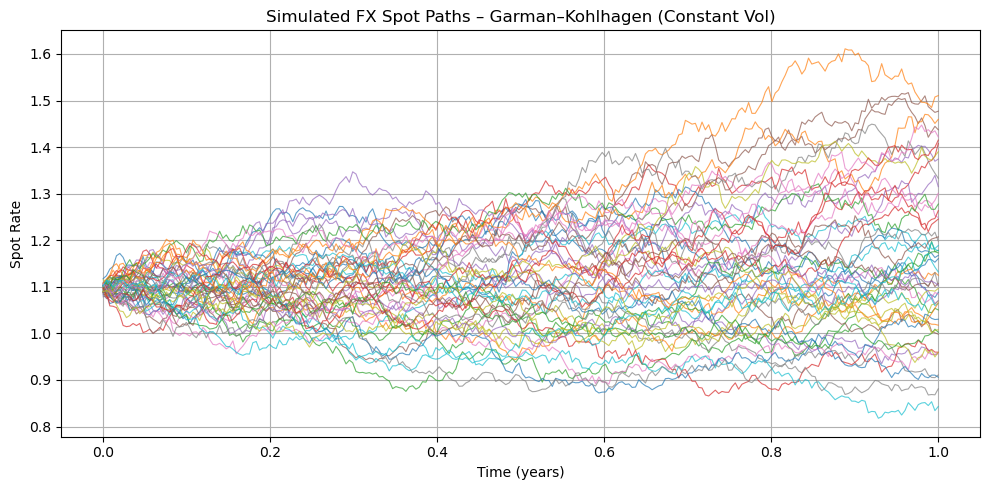

In [24]:
plt.figure(figsize=(10, 5))
for i in range(NoOfPaths):
    plt.plot(t, S_paths[i], lw=0.8, alpha=0.7)

plt.title("Simulated FX Spot Paths – Garman–Kohlhagen (Constant Vol)")
plt.xlabel("Time (years)")
plt.ylabel("Spot Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

## Summary

We successfully simulated FX spot paths using a simple lognormal model with constant volatility.

Next steps:
- Refactor this code into a Python class
- Create a module (`models/fx_model.py`)
- Update the notebook to use the class instead of inline code
